Obtenemos la informacion de CIFAR10

In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from random import randint

direc = './data/'
test_file ='test_batch'
labels_file='batches.meta'
filename = 'data_batch_'


def unpickle(file):
    with open(file, 'rb') as fo:
        dic = pickle.load(fo, encoding='bytes')
    return dic

def getCIFAR10(direc, filename, batches):
    #Converts the data of batches into a full trainning set
    for i in range(1,batches):
        file = direc + filename + str(i)
        dic = unpickle(file)
        if(i==1):
            X_train = dic[b'data']
            y_train = dic[b'labels']
        else:
            temp_X = dic[b'data']
            temp_y = dic[b'labels']
            X_train = np.concatenate((X_train, temp_X))
            y_train = np.concatenate((y_train, temp_y))
    return X_train, y_train



def get_CIFAR10_data():
    #reading the test data and labels in seperate variables
    X_train, y_train = getCIFAR10(direc, filename, 6)
    data_test = unpickle(direc + test_file)
    X_test = data_test[b'data']
    y_test = data_test[b'labels']
    meta_data = unpickle(direc + labels_file)
    label_names = meta_data[b'label_names']
    return X_train, y_train, X_test, y_test, label_names

Declaramos las funciones para poder calcular la distancia, según el método que se eliga (L1 o L2)

In [2]:
def euclidean_distance(a,b):
    return np.sqrt(np.sum((a-b)**2))

def manhathan_distance(a,b):
    return np.sum(np.abs(a-b))

Declaramos la clase KNN:

In [3]:
class K_Nearest_Neighbours:
    def __init__(self, k=3):
        self.k = k
    
    #Memorize all data and labels (It is not realy "trainning")
    def train(self, X, y):
        self.X_train = X
        self.labels = y

    #it just predicts the value of a single input     
    def predict(self, data, k):
        errors = [euclidean_distance(data,x_train) for x_train in self.X_train]
        #We'll use argssort to get the index of the element that obtained each error
        error_values =np.sort(errors)[:self.k]
        k_index_array = np.argsort(errors)[:self.k]
        k_neighbours_labels = [self.labels[i] for i in k_index_array]
        res = [{'id': k_index_array[i], 'error': error_values[i], 'label':k_neighbours_labels[i]} for i in range(self.k)]
        print(res)
        return res 
    


"Entrenamos" el modelo, que en este caso esto es solamente guardar todas las imagenes de muestra

In [4]:
    X_train, y_train, X_test, y_test, data_labels = get_CIFAR10_data()


In [5]:
def np_array_to_image(arr):
    image = np.reshape(arr, (3, 32, 32))
    image = np.transpose(image, (1, 2, 0))
    return image

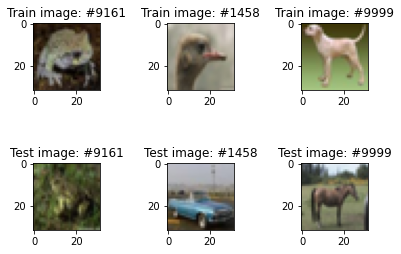

In [6]:
random_nums = [randint(0, 10000), randint(0, 10000), randint(0, 10000)]
plt.figure()
for i in range(3):
    a = plt.subplot(2, 3, i+1)
    plt.imshow(np_array_to_image(X_train[random_nums[i]]))
    a.set_title(f'Train image: #{random_nums[i]}')
    b = plt.subplot(2, 3, i+4)
    plt.imshow(np_array_to_image(X_test[random_nums[i]]))
    b.set_title(f'Test image: #{random_nums[i]}')
plt.subplots_adjust(wspace=1, hspace=0.8)

In [7]:
knn = K_Nearest_Neighbours(k=5)
knn.train(X_train, y_train)
random_num = randint(0,10000)
random_test_image = X_test[random_num]
random_image_label = y_test[random_num]
prediction_results = knn.predict(random_test_image,5)

[{'id': 2176, 'error': 510.97455905357947, 'label': 8}, {'id': 19237, 'error': 513.967897830205, 'label': 0}, {'id': 25412, 'error': 517.5712511336, 'label': 8}, {'id': 6565, 'error': 518.3193995983557, 'label': 8}, {'id': 31658, 'error': 518.8795621336419, 'label': 0}]


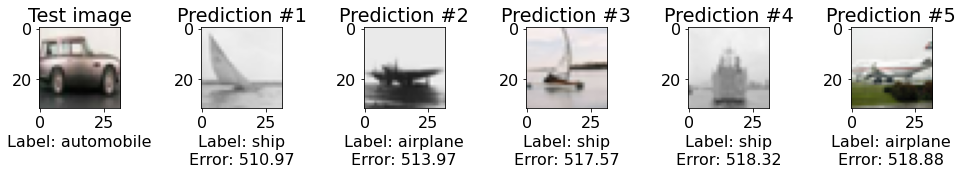

In [8]:
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(16,10))
a = plt.subplot(1, 5 + 1, 1)
plt.imshow(np_array_to_image(X_test[random_num]))
a.set_title(f'Test image')
plt.xlabel(f'Label: {data_labels[y_test[random_num]].decode()}')
for i in range(5):
    prediction = prediction_results[i]
    prediction_id = prediction['id']
    prediction_error = prediction['error']
    prediction_label = data_labels[prediction['label']].decode()
    a = plt.subplot(1, 5 + 1, i+2)
    plt.imshow(np_array_to_image(X_train[prediction_id]))
    a.set_title(f'Prediction #{i + 1}')
    plt.xlabel(f'Label: {prediction_label}\nError: {prediction_error:.2f}')
plt.subplots_adjust(wspace=1, hspace=0.8)